## Predict Ice Cream Sales

Using the room temperature and dollars earned, create a model to predict Ice Cream sales with temperature

In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

tf.__version__

'2.11.0'

In [60]:
sales_df = pd.read_csv("SalesData.csv")
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [61]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [62]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<Axes: xlabel='Temperature', ylabel='Revenue'>

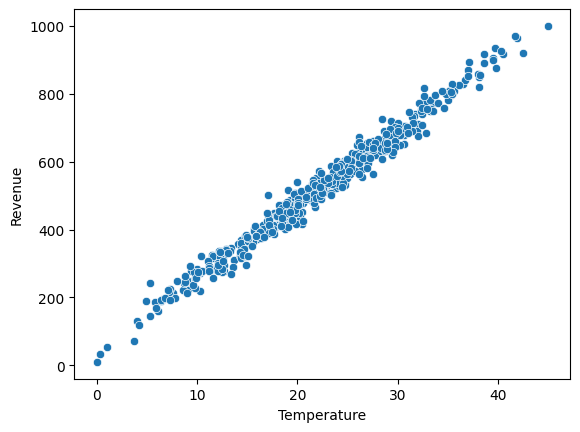

In [63]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue'])

In [64]:
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

y_train

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [65]:
y_train.shape, x_train.shape

((500,), (500,))

In [66]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a perceptron
model = Sequential()

model.add(Dense(units=10, input_shape=[1]))
model.add(Dense(units=1))


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer=Adam(0.1), loss="mean_squared_error")

epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500


16/16 [==============================] - 1s 2ms/step - loss: 167690.2812
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 13279.8467
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 3763.3821
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 1205.1760
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 816.2838
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 706.7448
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 674.3828
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 670.8719
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 672.9739
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 667.3907
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 673.1688
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 665.6014
Epoch 13/500
16/16

In [68]:
epochs_hist.history['loss'][123]

680.1127319335938

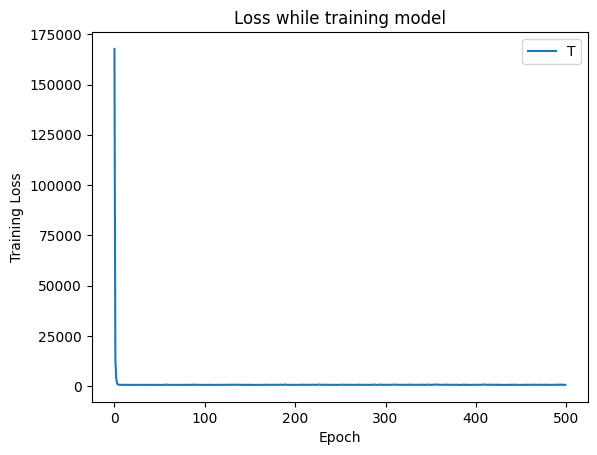

In [69]:
plt.plot(epochs_hist.history['loss'])
plt.title("Loss while training model")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend("Training Loss")

In [70]:
model.get_weights()

[array([[-0.01160604,  2.8085976 ,  0.01182263, -1.4175279 , -0.00628736,
         -2.316441  , -0.02453398,  0.03700221, -2.206276  ,  0.01312009]],
       dtype=float32),
 array([ 2.022565  ,  4.45797   , -0.33279112, -3.4191434 ,  0.29867038,
        -4.1523166 ,  0.85564536, -0.5551912 , -4.065397  , -0.4213885 ],
       dtype=float32),
 array([[ 0.07630216],
        [ 2.822994  ],
        [ 0.00394294],
        [-1.5113745 ],
        [ 0.00310973],
        [-2.556224  ],
        [-0.01731426],
        [ 0.00421921],
        [-2.4838998 ],
        [ 0.00756106]], dtype=float32),
 array([6.3255005], dtype=float32)]

1/1 [==============================] - 0s 73ms/step
Predicted Value Using the Trained ANN [[259.64783]]
16/16 [==============================] - 0s 1ms/step


Text(0.5, 0, 'Temperature [Celsius]')

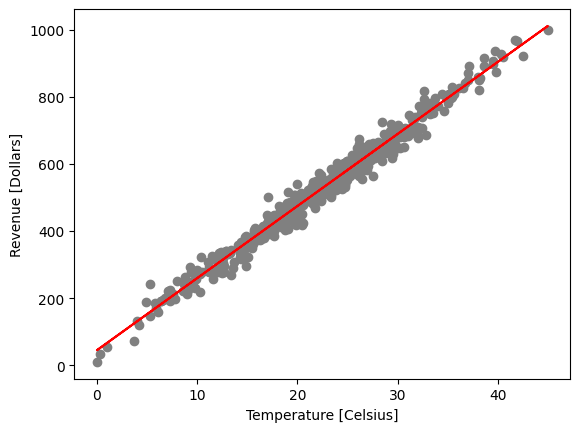

In [71]:
# Test the model
temp = 10
revenue = model.predict([temp])
print(f"Predicted Value Using the Trained ANN {revenue}")

plt.scatter(x_train, y_train, color="grey")
plt.plot(x_train, model.predict(x_train), color="red")
plt.ylabel("Revenue [Dollars]")
plt.xlabel("Temperature [Celsius]")

In [72]:
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [73]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [74]:
regressor.coef_

array([[21.44362551]])

In [75]:
regressor.intercept_

array([44.83126709])

Text(0.5, 0, 'Temperature [Celsius]')

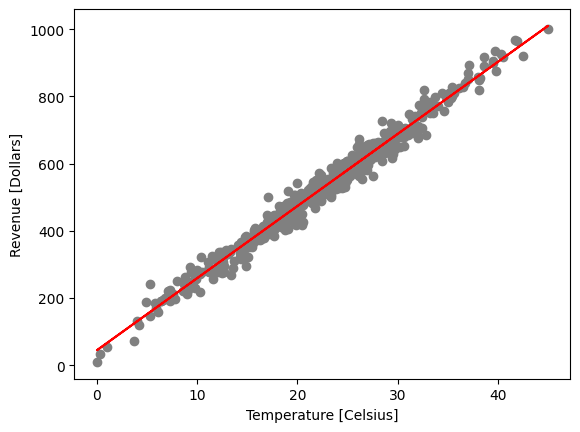

In [76]:
plt.scatter(x_train, y_train, color="grey")
plt.plot(x_train, regressor.predict(x_train), color="red")
plt.ylabel("Revenue [Dollars]")
plt.xlabel("Temperature [Celsius]")

In [78]:
regressor_rev = regressor.predict([[temp]])
print(f"The regressor gave: {regressor_rev}")

The regressor gave: [[259.2675222]]
